
# Project: Investigate a Dataset (TMDb Movie)
Saeed Ashri (saeed3167@gmail.com)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In last few years, entertainment industry is increased. One of the important field is film industry. In this project, we foucus on answer some question related to film industry by using <b>(TMDb)</b> Movie dataset.There are 13 questions:
- What is the highest popularity movie and lowest popularity?
- Which movie that has highest and lowest budget?
- Which movie that has highest and lowest revenue?
- What is the length of movie that has highest and lowest revenue?
- what are the Top 10 movies that have the highest budget?
- what are the Top 10 movies that have the highest revenue?
- What is the number of movie in each genres? 
- Which is the shortest and longest movie?and in which year?
- What are the top 10 production companies that produced the highest and Lowest number of movies?
- What movie has the highest vote and lowest vote?
- What is the number of movies released each year?
- What was the number of movies that were released each month?
- What is the relation between budget and popularity?

In [1]:
#Import Library related to this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> In this part, we'll explore the dataset. In a few next cells, we'll load the dataset of <b>TMDb Movie</b> and then shows the first two rows. After that, we'll prepare data to see columns that have null values, the number of duplicated rows, the number of rows and columns, and the data type of each column.  

In [2]:
#Read dataset file
df = pd.read_csv('tmdb-movies.csv')
#show 2 rows
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#see null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
#Number of dublicate row
df.duplicated().sum()

1

In [5]:
#Number of rows and columns
df.shape

(10866, 21)

In [6]:
#Information about dataset that use to see data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (Drop unusable columns and drop dublicate)

> in this section, I'll clean the dataset by dropping unnecessary columns, duplicated rows, and null values.   


in this section,    Also, I obvious that the budget and revenue are 0, so I dorp any row that has 0 in budget and revenue. Again, I checked null values and I saw <b>production_companies</b> column has 46 null value, so, I drop each row has null value. After that I checked the number of rows and columns where I got 3808 rows and 12 columns. Then, I changed data type of some columns because these helps to analysing data. Then, I I show first 5 rows and checked data type.

- I've removed unnessary columns that don't help for answering our the questions.

In [7]:
#drop columns that we don't use
df_v1 = df.drop(columns=['imdb_id', 'cast', 'homepage','director','tagline','keywords', 'overview','budget_adj', 'revenue_adj'])

- Then, I droped dublicate rows.

In [8]:
#drop dublicate rows
df_v1 = df_v1.drop_duplicates()

- Then, I checked number of dublicated rows again.

In [9]:
#Check dublicate rows
df_v1.duplicated().sum()

0

- After that, I check null value again, so I saw <b>genres</b> column because it has 23 null value.

In [10]:
#Check null values
df_v1.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [11]:
#Show null valus of genres
df_v1[df_v1['genres'].isnull()]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
424,363869,0.244648,0,0,Belli di papÃ,100,NaN,NaN,10/29/15,21,6.1,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,NaN,10/3/14,13,6.8,2014
1712,21634,0.302095,0,0,Prayers for Bobby,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,NaN,2/27/09,11,7.0,2009
2370,127717,0.081892,0,0,Freshman Father,0,NaN,NaN,6/5/10,12,5.8,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,NaN,12/25/10,11,7.7,2010
2853,57892,0.130018,0,0,Vizontele,110,NaN,NaN,2/2/01,12,7.2,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,NaN,8/13/08,11,6.1,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,BBC,7/27/12,12,8.3,2012


- As it can be seen previsly, some of budget and revenue columns are 0.
- We got all rows that have 0 in budget and revenue, and then we dropped them from the dataset.

In [12]:
#Shows budget = 0
df_v1[df_v1['budget'] == 0]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015
72,284289,2.272044,0,45895,Beyond the Reach,95,Thriller,Furthur Films,4/17/15,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966
10861,21,0.080598,0,0,The Endless Summer,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966


In [13]:
#Shows revenue = 0
df_v1[df_v1['revenue'] == 0]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,Wild Card,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
92,370687,1.876037,0,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [14]:
#Drop rows that have budget and revenue = 0
indexBudgetRevenue = df_v1[ (df_v1['budget']  == 0) | (df_v1['revenue']  == 0) ].index
df_v1.drop(indexBudgetRevenue , inplace=True)

- I checked null values and I saw <b>production_companies</b> column has 46 null value, so, I dropped each row has null value.

In [15]:
#Check null values
df_v1.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
dtype: int64

In [16]:
#Drop rows that have null in any columns
df_v1.dropna(inplace=True)

In [17]:
#Check null value
df_v1.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

- After that, I checked the number of rows and columns where I got 3808 rows and 12 columns. Then, I changed the data type of some columns because this helps to analyse data. Then, I displayed the first 5 rows and checked the data type.

In [18]:
#Number of rows and columns
df_v1.shape

(3808, 12)

In [19]:
#Information about dataset that use to see data type
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3808 non-null   int64  
 1   popularity            3808 non-null   float64
 2   budget                3808 non-null   int64  
 3   revenue               3808 non-null   int64  
 4   original_title        3808 non-null   object 
 5   runtime               3808 non-null   int64  
 6   genres                3808 non-null   object 
 7   production_companies  3808 non-null   object 
 8   release_date          3808 non-null   object 
 9   vote_count            3808 non-null   int64  
 10  vote_average          3808 non-null   float64
 11  release_year          3808 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 386.8+ KB


In [20]:
#Change data types of columns
df_v1['id'] = df_v1.id.astype('string')
df_v1['budget'] = df_v1.budget.astype('float')
df_v1['revenue'] = df_v1.revenue.astype('float')
df_v1['release_date'] = pd.to_datetime(df_v1['release_date']) 
#get Month and add to separet column
df_v1['month'] = df_v1['release_date'].dt.month_name()

In [21]:
#Shows first 5 rows
df_v1.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,May
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,March
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,December
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,April


In [22]:
#Information about dataset that use to see data type
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3808 non-null   string        
 1   popularity            3808 non-null   float64       
 2   budget                3808 non-null   float64       
 3   revenue               3808 non-null   float64       
 4   original_title        3808 non-null   object        
 5   runtime               3808 non-null   int64         
 6   genres                3808 non-null   object        
 7   production_companies  3808 non-null   object        
 8   release_date          3808 non-null   datetime64[ns]
 9   vote_count            3808 non-null   int64         
 10  vote_average          3808 non-null   float64       
 11  release_year          3808 non-null   int64         
 12  month                 3808 non-null   object        
dtypes: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I'll answer the 14 questions that we wrote in the introduction.

## Functions

> This section contains functions that help us when we need to use code many times.

In [23]:
# function gives name of film by using specific column with max or min
def highLow(dfMovies,colMaxMin,stat='max',arg=1):
    if arg == 1:
        #Get Max or Min column that you need
        maxMin = dfMovies[str(colMaxMin)].agg(stat)
        #Query to get movie name by using min popularity
        NameMovie = dfMovies['original_title'][dfMovies[str(colMaxMin)] == maxMin]
        if stat == 'max':
            for i in NameMovie:
                print('The highest '+colMaxMin+' for movie is: (' + i +')')
        elif stat =='min':
            for i in NameMovie:
                print('The lowest '+colMaxMin+' for movie is: (' + i +')')
    elif arg ==2:
        maxMin = dfMovies[str(colMaxMin)].agg(stat)
        #Query to get movie name by using min popularity
        NameMovie = dfMovies['original_title'][dfMovies[str(colMaxMin)] == maxMin]
        #Query to get movie runtime by using min revenue
        runMovie = dfMovies['runtime'][dfMovies[str(colMaxMin)] == maxMin]
        if stat == 'max':
            for i,j in zip(NameMovie,runMovie):
                print('The highest '+colMaxMin+' movie is: (' + i +') '+'that has length ' +str(j)+ ' Minute')
        elif stat =='min':
            for i,j in zip(NameMovie,runMovie):
                print('The Lowest '+colMaxMin+' movie is: (' + i +') '+'that has length ' +str(j)+ ' Minute')
            

### Question 1 (What is the highest popularity movie and lowest popularity?)

> In this part, it can be seen, the codes below answer this question. The highest popular movie is (Jurassic World). The Lowest popularity movie is (Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´). However, it can be seen, the lowest popularity movie is not clear so, it deleted this row and did the code again and got The Lowest popularity movie is (Spacehunter: Adventures in the Forbidden Zone).

In [24]:
#Calling function to get result
highLow(df_v1,'popularity',arg=1)

The highest popularity for movie is: (Jurassic World)


In [25]:
#Calling function to get result
highLow(df_v1,'popularity','min',arg=1)

The lowest popularity for movie is: (Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´)


In [26]:
#Get Min popularity
popularityMin = df_v1.popularity.min()

#Drop row that has unclear name of movie
i = df_v1[df_v1['popularity'] == popularityMin].index.values.astype(int)[0]
df_v1 = df_v1.drop(i)

In [27]:
#Calling function to get result
highLow(df_v1,'popularity','min',arg=1)

The lowest popularity for movie is: (Spacehunter: Adventures in the Forbidden Zone)


### Question 2  (Which movie that has highest and lowest budget?)

> It can be seen, the highest movie that was spent on it is (The Warrior's Way), However, the lowest movie is shared between (Lost & Found) and (Love, Wedding, Marriage).

In [28]:
#Calling function to get result
highLow(df_v1,'budget',arg=1)

The highest budget for movie is: (The Warrior's Way)


In [29]:
#Calling function to get result
highLow(df_v1,'budget','min',arg=1)

The lowest budget for movie is: (Lost & Found)
The lowest budget for movie is: (Love, Wedding, Marriage)


### Question 3  (Which movie that has highest and lowest revenue?)

> In this section, we answered the question about revenue. The highest revenue movie is (Avatar). On the other hand, The Lowest revenue movie is shared between (Shattered Glass) and (Mallrats).

In [30]:
#Calling function to get result
highLow(df_v1,'revenue',arg=1)

The highest revenue for movie is: (Avatar)


In [31]:
#Calling function to get result
highLow(df_v1,'revenue','min',arg=1)

The lowest revenue for movie is: (Shattered Glass)
The lowest revenue for movie is: (Mallrats)


### Question 4  (What is the length of movie that has highest and lowest revenue?)

> The codes below gave the length of the movie that has the highest and lowest revenue. The length of (Avatar) is 162 Minutes. However, the length of the lowest revenue is shared between (Shattered Glass) and (Mallrats) which has 94 Minutes.

In [32]:
#Calling function to get result
highLow(df_v1,'revenue',arg=2)

The highest revenue movie is: (Avatar) that has length 162 Minute


In [33]:
#Calling function to get result
highLow(df_v1,'revenue','min',arg=2)

The Lowest revenue movie is: (Shattered Glass) that has length 94 Minute
The Lowest revenue movie is: (Mallrats) that has length 94 Minute


### Question 5  (what are the Top 10 movies that have the highest budget?)

> This section answered the question of the top 10 movies that have the highest budget. The table below illustrates the top 10 movies with their budgets.

In [34]:
#Get top 10 movies by budget
df_v1[['original_title', 'budget']].sort_values('budget',ascending=False,ignore_index=True)[:10]

,original_title,budget
0,The Warrior's Way,425000000.0
1,Pirates of the Caribbean: On Stranger Tides,380000000.0
2,Pirates of the Caribbean: At World's End,300000000.0
3,Avengers: Age of Ultron,280000000.0
4,Superman Returns,270000000.0
5,Tangled,260000000.0
6,John Carter,260000000.0
7,Spider-Man 3,258000000.0
8,The Lone Ranger,255000000.0
9,The Hobbit: The Battle of the Five Armies,250000000.0


### Question 6 (what are the Top 10 movies that have the highest revenue?)

> This section answered the question of the top 10 movies that have the highest revenue. The table below illustrates the top 10 movies with their revenues.

In [35]:
#Get top 10 movies by revenue
df_v1[['original_title', 'revenue']].sort_values('revenue',ascending=False,ignore_index=True)[:10]

,original_title,revenue
0,Avatar,2.781506e+09
1,Star Wars: The Force Awakens,2.068178e+09
2,Titanic,1.845034e+09
3,The Avengers,1.519558e+09
4,Jurassic World,1.513529e+09
5,Furious 7,1.506249e+09
6,Avengers: Age of Ultron,1.405036e+09
7,Harry Potter and the Deathly Hallows: Part 2,1.327818e+09
8,Frozen,1.274219e+09
9,Iron Man 3,1.215440e+09


- The two tables show the top 10 movies and their budget and revenue. Those tables could use them to compare the budget of movies with revenue. It can be seen, it's not necessary for all movies with the highest budget to equal with movies that have the highest revenue

### Question 7  (What is the number of movie in each genres? )

> Firstly, we've explored the genres column. It can be seen, each movie has more than one genre. So, counting the number of movies in each genre, need to separate and cut it by using (<b>|</b>) simple. After that, we will count the number of movies that has specific genres then use a horizontal bar chart to display numbers. 

In [36]:
#Shows fiirst 5 rows in genres column
df_v1['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [37]:
#separate row by using | and then count number of each genre and add to data frame to displayed
genres = df_v1['genres'].str.cat(sep = '|')
genresMovieCount = pd.Series(genres.split('|')).value_counts(ascending=False)
df_genresMovieCount = pd.DataFrame({'Number of Movie':genresMovieCount})
df_genresMovieCount

,Number of Movie
Drama,1731
Comedy,1336
Thriller,1195
Action,1075
Adventure,743
Romance,659
Crime,649
Science Fiction,517
Horror,459
Family,417


- This table shows number of movies in each genre. The highest geners is Drama which is 1731 movies.However, the lowest geners is TV movie which is 1 movie. 

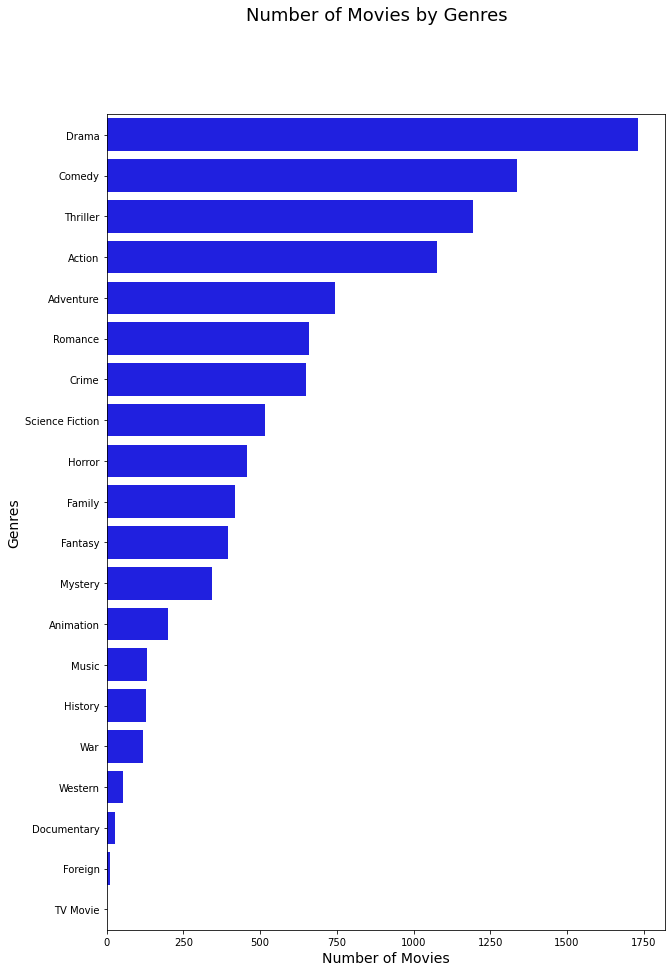

In [38]:
# Using Matplotlib and seaborn to visual number of movie in each genre
plt.subplots(figsize=(10, 15))
sns.barplot(y=df_genresMovieCount.index,x=df_genresMovieCount['Number of Movie'],orient = 'h',color='b');
plt.suptitle('Number of Movies by Genres',fontsize=18)
plt.xlabel('Number of Movies',fontsize=14)
plt.ylabel('Genres',fontsize=14)
plt.show();

- The figure illustrates number of movies in each genre in the easiest way. It can be seen, Drama has a high number of movies compared with other genres. Also, it can be seen, how drama is far when compared with other genres.

### Question 8  (Which is the shortest and longest movie?and in which year?)

> This part answered the question of the longest and shortest movie and the year of the movies. 

In [39]:
# Get 'original_title','runtime', 'release_year' columns and sort them by 'runtime' and get first one.
df_v1[['original_title','runtime', 'release_year']].sort_values('runtime',ascending=False,ignore_index=True)[:1]

,original_title,runtime,release_year
0,Carlos,338,2010


In [40]:
# Get 'original_title','runtime', 'release_year' columns and sort them by 'runtime' and get last one.
df_v1[['original_title','runtime', 'release_year']].sort_values('runtime',ascending=False,ignore_index=True)[-1:]

,original_title,runtime,release_year
3806,Kid's Story,15,2003


- It can be seen, the tables compare the run times of two movies. The highest run-time for movies is 338 minutes. However, the lowest run time of the movies is 15 minutes.

### Question 9  (What are the top 10 production companies that produced the highest and Lowest number of movies?)

> In this part, the codes below answered the question of the top 10 companies that produced movies in the dataset. Also, the codes answered about the lowest 10 companies.

In [41]:
#Count number of movies in each company then print top 10
df_production = df_v1.production_companies.value_counts()[:10]
df_production

Paramount Pictures                        77
Universal Pictures                        57
Columbia Pictures                         39
New Line Cinema                           38
Warner Bros.                              33
Metro-Goldwyn-Mayer (MGM)                 26
Touchstone Pictures                       24
Twentieth Century Fox Film Corporation    23
20th Century Fox                          22
Walt Disney Pictures                      22
Name: production_companies, dtype: int64

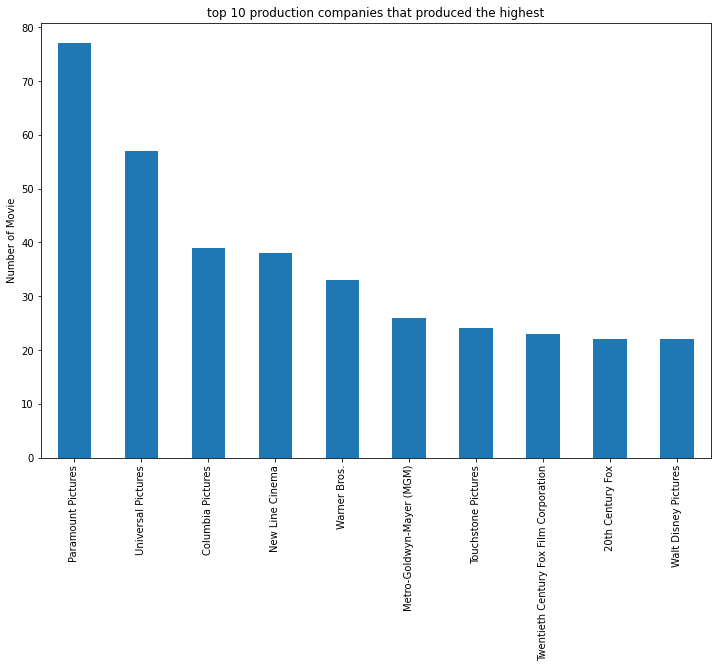

In [42]:
#Visualize top 10 companies
df_production.plot(kind='bar',figsize=(12,8))
plt.title('top 10 production companies that produced the highest')
plt.ylabel('Number of Movie');

- The bar chart represents the number of movies for each production company. The chart appears Paramount Pictures company produced the highest number of movies compared with other companies. 

In [43]:
#Count number of movies in each company then print last 10
df_v1.production_companies.value_counts()[-10:]

Universal Pictures|Big Talk Productions|Relativity Media|Working Title Films                                        1
Paramount Pictures|Denver and Delilah Productions|Indian Paintbrush                                                 1
Solaris Film|Lionsgate|Mimran Schur Pictures|Filmtribe                                                              1
Lions Gate Films|Vertigo Entertainment|Gotham Group|Tailor Made|Mango Farms                                         1
Studio Babelsberg|StudioCanal|Dark Castle Entertainment|TF1 Films Production|Canal+                                 1
Universal Pictures|Media Rights Capital|Gambit Pictures|Electric Shepherd Productions                               1
Virgin Produced|Mark Canton Productions                                                                             1
Paramount Vantage|Andrea Sperling Productions|Indian Paintbrush|Super Crispy Entertainment|Ascension Productions    1
Universal Pictures|Playtone Productions|Vendome Pictures

### Question 10  (What movie has the highest vote and lowest vote?)

> In this section, the codes answered the question that the highest vote movie and the lowest votes movie which is shared between many movies. The highest vote is for (Inception).

In [44]:
#Calling function to get result
highLow(df_v1,'vote_count',arg=1)

The highest vote_count for movie is: (Inception)


In [45]:
#Calling function to get result
highLow(df_v1, 'vote_count', 'min',arg=1)

The lowest vote_count for movie is: (Beautiful)
The lowest vote_count for movie is: (In Too Deep)
The lowest vote_count for movie is: (Trick)
The lowest vote_count for movie is: (Down)
The lowest vote_count for movie is: (Julia)
The lowest vote_count for movie is: (The Kid Stays in the Picture)
The lowest vote_count for movie is: (Redd Inc.)
The lowest vote_count for movie is: (Cats Don't Dance)
The lowest vote_count for movie is: (Black Nativity)
The lowest vote_count for movie is: (Sheena)
The lowest vote_count for movie is: (Best Defense)
The lowest vote_count for movie is: (Private Lessons)
The lowest vote_count for movie is: (Citizen Ruth)
The lowest vote_count for movie is: (Mrs. Winterbourne)
The lowest vote_count for movie is: (Gun Shy)
The lowest vote_count for movie is: (Edge of Seventeen)
The lowest vote_count for movie is: (How Stella Got Her Groove Back)
The lowest vote_count for movie is: (A Rage in Harlem)
The lowest vote_count for movie is: (The New Adventures of Pippi 

### Question 11  (What is the number of movies released each year?)

> In this part, the code below answered the question about the number of movies in each year.

In [46]:
# Number of movie un each year
countYear = pd.DataFrame({'count': df_v1.groupby(['release_year']).count()['id']})
countYear

,count
release_year,
1960,5
1961,10
1962,7
1963,6
1964,7
1965,5
1966,5
1967,13
1968,9


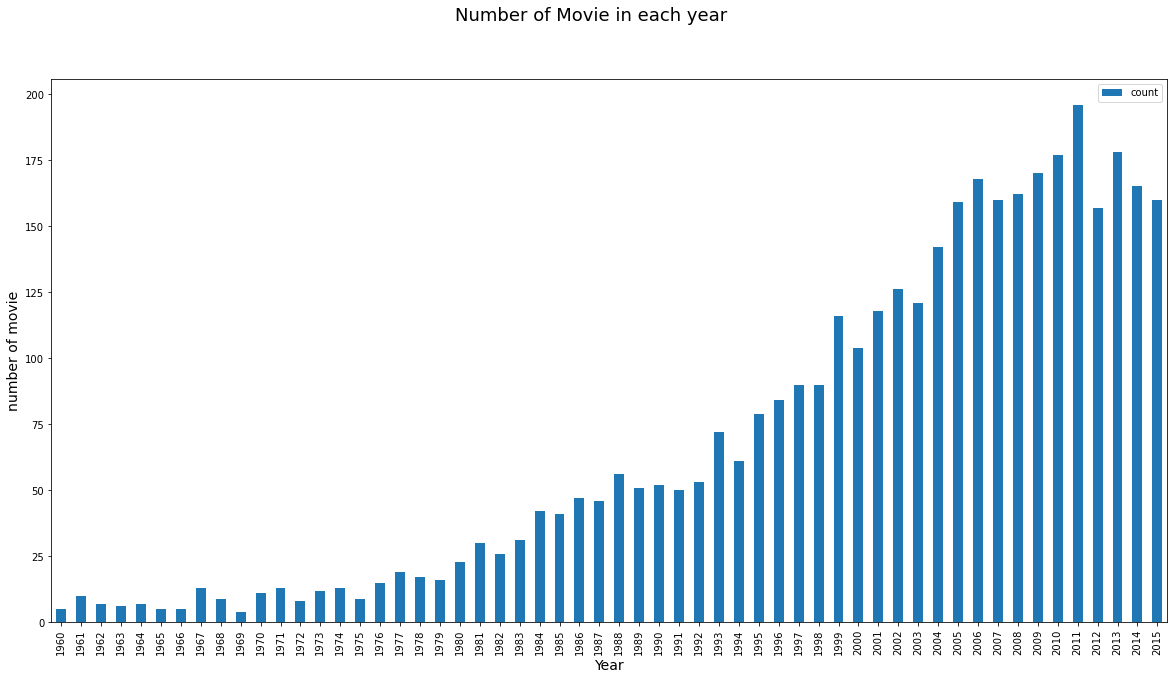

In [47]:
#Visualize top 10 companies
countYear.plot(kind='bar',figsize=(20,10))
plt.suptitle('Number of Movie in each year',fontsize=18)
plt.xlabel('Year',fontsize=14)
plt.ylabel('number of movie',fontsize=14)
plt.show();

- The figure displays the number of movies each year. It shows that 2011 has the highest number of movies. On the other hand, the lowest number of movies is in 1969. 

### Question 12  (What was the number of movies that were released each month?)

> This part answered the question about the number of movies released in specific months.

In [48]:
#Count number of movies in each month
countMonth = pd.DataFrame({'count': df_v1.groupby(['month']).count()['id']})
#Order result by months
monthOrder = ('January', 'February', 'March', 'April','May',  'June','July', 'August', 'September', 'October','November','December')
countMonth = countMonth.reindex(monthOrder)
countMonth

,count
month,
January,219
February,252
March,277
April,261
May,290
June,339
July,309
August,334
September,453


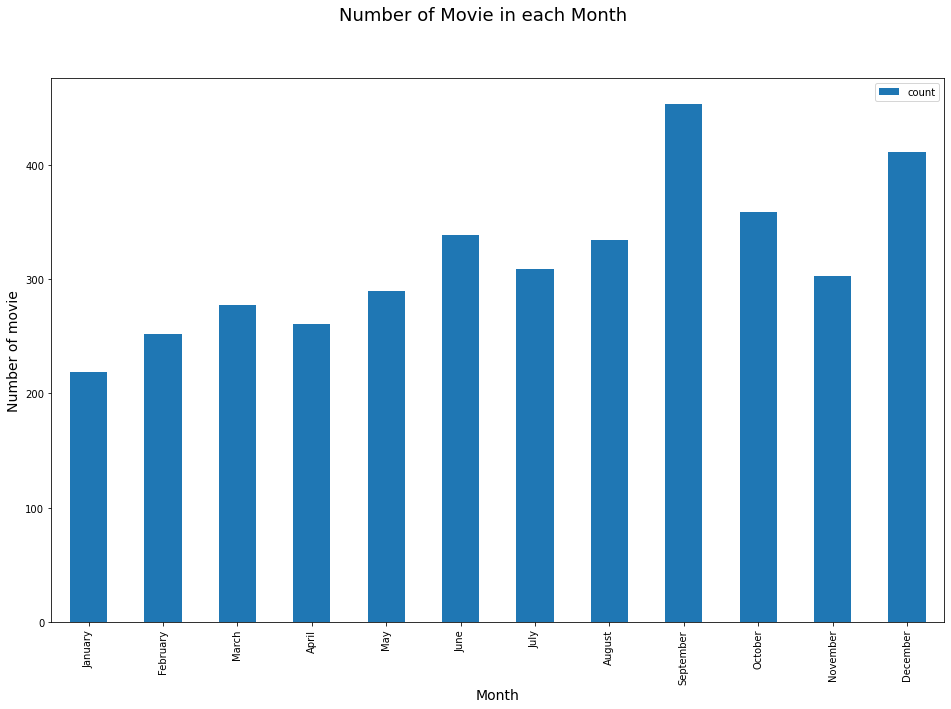

In [49]:
#Visualize number of movies in each month
countMonth.plot(kind='bar',figsize=(16,10))
plt.suptitle('Number of Movie in each Month',fontsize=18)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of movie',fontsize=14)
plt.show();

- The bar chart shows the number of movies each month. the figure appears the highest number of movies released in October. However, the month of January is not the best month for releasing movies because it has the lowest number of movies that are released. 

### Question 13  (What is the relation between budget and (popularity, and revenue )? )

> In this section, the scatter chart answered the question about the relationship between budget and popularity.

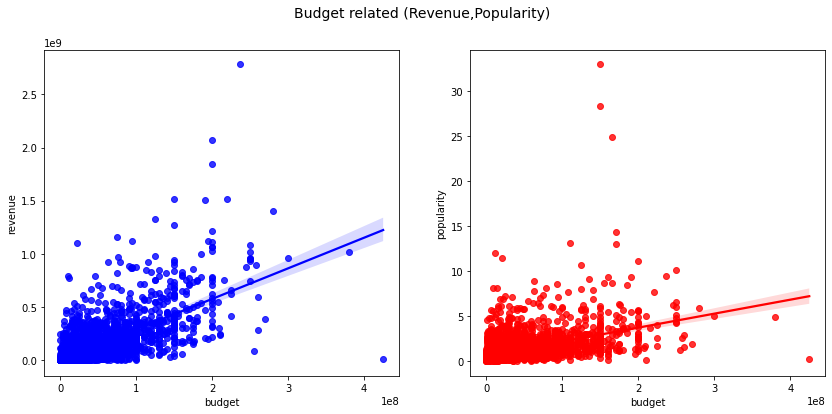

In [50]:
#Visualize relationship btween budget and popularity,vote average, revenue and run time
fig, ax = plt.subplots(1,2,figsize = (14,6))
fig.suptitle("Budget related (Revenue,Popularity)",fontsize=14)

sns.regplot(x=df_v1.budget, y=df_v1.revenue, ax=ax[0], color='b')
sns.regplot(x=df_v1.budget, y=df_v1.popularity, ax=ax[1], color='r');

- The figures explore the relationship between revenue with budget and revenue with popularity. The scatters chart shows increasing the budget influences revenue and popularity. So, if a production company needs to succeed in its movie, it should spend more money on it.  

<a id='conclusions'></a>
## Conclusions

- The most popular movie is (Jurassic World)
- The movie that has the highest budget is (The Warrior's Way)
- The lowest budget for movies is for (Lost & Found) and (Love, Wedding, Marriage).
- The highest revenue movie is (Avatar) and the Lowest revenue movie is (Shattered Glass) and (Mallrats).
- The movie that has the highest number of votes is (Inception)
- The highest number of movies by genres are Drama, Comedy and Thriller. 
- Respectively, the companies that have produced most movies are Paramount Pictures, Universal Pictures, Columbia Pictures, New Line Cinema, Warner Bros, Metro-Goldwyn-Mayer (MGM), Touchstone Pictures, Twentieth Century Fox Film Corporation, 20th Century Fox, and Walt Disney PicturesRespectively, the companies that have produced most movies are Paramount Pictures, Universal Pictures, Columbia Pictures, New Line Cinema, Warner Bros, Metro-Goldwyn-Mayer (MGM), Touchstone Pictures, Twentieth Century Fox Film Corporation, 20th Century Fox, and Walt Disney Pictures
- in 2011, the number of movies is a maximum which is 196 movies.
- The top 3 months that released movies in it are September, December, and October.
- In general, the budget is related to revenue and popularity where increasing the budget affects increasing revenue and popularity.

## Limitations

- The number of rows in the dataset after cleaning is not enough which loses more than 65%.
- We need more resources for movie data to get suitable results.